# Modelo de riesgo proporcional de Cox

El modelo de riesgo proporcional de Cox es un modelo de regresión generalmente utilizado por investigadores médicos para determinar la relación entre el tiempo de supervivencia de un sujeto y una o más variables predictoras. En resumen, queremos averiguar cómo diferentes parámetros como la edad, el sexo, el peso, la altura afectan el tiempo de supervivencia de un sujeto.

En la sección anterior, vimos Kaplan-Meier, Nelson-Aalen y Log-Rank-Test. Sin embargo, en eso, solo pudimos considerar una variable a la vez, y una cosa más para notar es que estábamos realizando operaciones solo en variables categóricas como sexo, estado y otras. No se puede utilizar para datos no categóricos como edad, peso o altura. Como solución para eso, utilizamos el análisis de regresión de riesgos proporcionales de Cox, que funciona tanto para predictores cuantitativos variables no categóricas como para variables categóricas.

#### ¿Por qué lo necesitamos?

En la investigación médica, generalmente consideramos más de un factor para diagnosticar la salud o el tiempo de supervivencia de una persona. es decir, generalmente hacemos uso de su sexo, edad, presión arterial y azúcar en sangre para averiguar si hay alguna diferencia significativa entre los de diferentes grupos. Por ejemplo, si agrupamos nuestros datos en función de la edad de una persona, nuestro objetivo será determinar qué grupo de edad tiene una mayor probabilidad de supervivencia. ¿Es ese grupo de niños, grupo de adultos o grupo de personas mayores? Ahora, lo que necesitamos encontrar es ¿sobre qué base formamos un grupo? Para encontrar eso, usamos la regresión de Cox y encontramos los coeficientes de diferentes parámetros. ¡Veamos cómo funciona eso!
Conceptos básicos del método de riesgo proporcional de Cox

El propósito final del método de riesgo proporcional de Cox es notar cómo diferentes factores en nuestro conjunto de datos impactan el evento de interés.

##### Función de peligro:

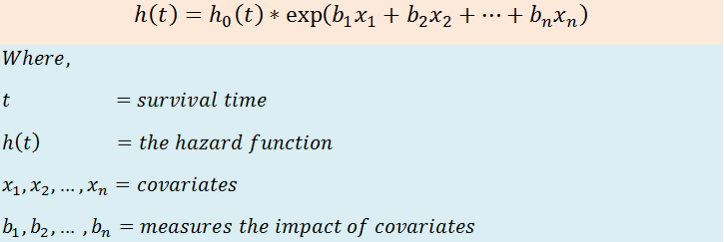

El valor de exp (bi) se llama Hazard Ratio (HR). Lo entenderemos tomando un ejemplo.

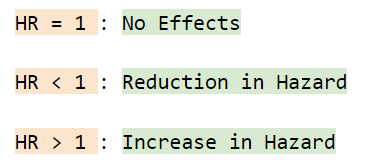

##### Importe las bibliotecas necesarias:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

##### Lea el archivo CSV:

In [2]:
data = pd.read_csv("lung.csv")
data =  data.drop(["Unnamed: 0"],axis=1)
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [3]:
data.columns

Index(['inst', 'time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno',
       'pat.karno', 'meal.cal', 'wt.loss'],
      dtype='object')

##### Elimine filas que contienen valores nulos:

A continuación, debemos eliminar las filas que tienen valores nulos. Nuestro modelo no puede funcionar en filas que tienen valores nulos. Si no preprocesamos nuestros datos, es posible que obtengamos un error.

In [4]:
#Drop rows with null values:

data= data.dropna(subset=['inst', 'time', 'status', 'age', 'sex', 
                          'ph.ecog','ph.karno', 'pat.karno', 'meal.cal', 'wt.loss'])
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
5,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0
6,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0


##### Cree un objeto para KapanMeierFitter:

In [5]:
kmf = KaplanMeierFitter() 

##### Organiza los datos:

In [6]:
data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
5,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0,0.0
6,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0,1.0
7,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0,1.0


##### Encaja los datos en un objeto:

In [7]:
kmf.fit(durations =  data["time"], event_observed = data["dead"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 167 total observations, 47 right-censored observations>

##### Generando la tabla de eventos:

In [8]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,167,167
5.0,1,1,0,0,167
11.0,1,1,0,0,166
12.0,1,1,0,0,165
13.0,1,1,0,0,164
...,...,...,...,...,...
814.0,1,1,0,0,5
821.0,1,0,1,0,4
840.0,1,0,1,0,3


##### Obtenga las columnas requeridas:

In [11]:
#Get required columns from the data:

data = data[[ 'time', 'age', 'sex', 'ph.ecog','ph.karno',
             'pat.karno', 'meal.cal', 'wt.loss', 'dead']]

##### Ajuste los datos e imprima el resumen:

In [12]:
cph = CoxPHFitter()
cph.fit(data,"time",event_col="dead")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'dead'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -494.03
         time fit was run = 2021-11-14 15:50:52 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.55       0.57       0.20            -0.95            -0.16                 0.39                 0.85
ph.ecog     0.74       2.09       0.22             0.30             1.18                 1.35                 3.26
ph.karno    0.02       1.02       0.01             0.00             0.04                 1.00                 1.05
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00

              z      p   -log2(p)
covariate                        
age        0.93   0.35       1.51
sex       -2.75   0.01       7.37
ph.ecog    3.29 <0.005       9.95
ph.karno   2.00   0.05       4.45
pat.karno -1.49   0.14       2.87
meal.cal   0.11   0.91       0.13
wt.loss   -1.83   0.07       3.89
---
Concordance = 0.65
Partial AIC = 1002.07
log-likelihood ratio test = 28.16 on 7 df
-log2(p) of ll-ratio test = 12.25

The Cox regression results can be interpreted as follow:

- Statistical significance. The column marked “z” gives the Wald statistic value. It corresponds to the ratio of each regression coefficient to its standard error (z = coef/se(coef)). The wald statistic evaluates, whether the beta (β) coefficient of a given variable is statistically significantly different from 0. From the output above, we can conclude that the variable sex have highly statistically significant coefficients.

- The regression coefficients. The second feature to note in the Cox model results is the the sign of the regression coefficients (coef). A positive sign means that the hazard (risk of death) is higher, and thus the prognosis worse, for subjects with higher values of that variable. The variable sex is encoded as a numeric vector. 1: male, 2: female. The R summary for the Cox model gives the hazard ratio (HR) for the second group relative to the first group, that is, female versus male. The beta coefficient for sex = -0.53 indicates that females have lower risk of death (lower survival rates) than males, in these data.

- Hazard ratios. The exponentiated coefficients (exp(coef) = exp(-0.53) = 0.59), also known as hazard ratios, give the effect size of covariates. For example, being female (sex=2) reduces the hazard by a factor of 0.59, or 41%. Being female is associated with good prognostic.

- Confidence intervals of the hazard ratios. The summary output also gives upper and lower 95% confidence intervals for the hazard ratio (exp(coef)), lower 95% bound = 0.4237, upper 95% bound = 0.816.

- Global statistical significance of the model. Finally, the output gives p-values for three alternative tests for overall significance of the model: The likelihood-ratio test, Wald test, and score logrank statistics. These three methods are asymptotically equivalent. For large enough N, they will give similar results. For small N, they may differ somewhat. The Likelihood ratio test has better behavior for small sample sizes, so it is generally preferred.

En la imagen de arriba, observe el valor p para cada columna en nuestro conjunto de datos. A continuación, sabemos que un valor de p <0,05 se considera estadísticamente significativo. Aquí podemos ver que "sex" y "ph.ecog" tienen valores de p menores a 0.05. Entonces, podemos decir que al agrupar nuestros datos para el análisis, debemos centrarnos en dividir los datos en función de estos dos factores.

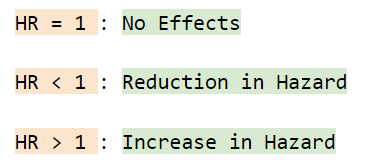

Aquí observe que el valor p para "sexo" es 0.01, y el Hazard Ratio (HR) es 0.57, lo que indica una fuerte relación entre el sexo de los pacientes y un menor riesgo de muerte. Por ejemplo, si se mantienen constantes las otras covariables, ser mujer (sexo = 2) reduce el riesgo en un factor de 0,57, o 43%. Eso significa que las mujeres tienen mayores posibilidades de supervivencia. A continuación, el valor p para ph.ecog es <0,005 y el Hazard Ratio (HR) es 2,09, lo que indica una fuerte relación entre el valor ph.ecog y el aumento del riesgo de muerte. Manteniendo las otras covariables constantes, un valor más alto de ph.ecog se asocia con una supervivencia deficiente. En este caso, la persona con un valor ph.ecog más alto tiene un riesgo de muerte 109% mayor. Entonces, en resumen, podemos decir que los médicos deben tratar de reducir el valor de ph.ecog en los pacientes proporcionando medicamentos relevantes. A continuación, observe que el índice de riesgo (HR) para la edad es 1.01, lo que sugiere solo un aumento del 1% para un grupo de mayor edad. Entonces podemos decir que no existe una diferencia significativa entre los diferentes grupos de edad.

##### Compruebe qué factor afecta más en el gráfico:

En el siguiente gráfico, podemos notar la diferencia en los datos de “sexo” y “ph.ecog”.

<AxesSubplot:xlabel='log(HR) (95% CI)'>

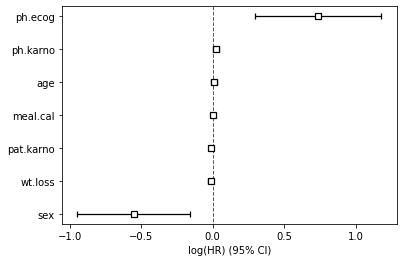

In [13]:
#Plot the result on graph:

cph.plot()

##### Verifique nuestra teoría con observaciones reales:

Comprobemos nuestras conclusiones con datos reales de nuestras observaciones.

In [14]:
data.iloc[10:15,:]

,time,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
17,707,63,1,2.0,50.0,70.0,1025.0,22.0,1.0
18,61,56,2,2.0,60.0,60.0,238.0,10.0,1.0
20,301,67,1,1.0,80.0,80.0,1025.0,17.0,1.0
21,81,49,2,0.0,100.0,70.0,1175.0,-8.0,1.0
23,371,58,1,0.0,90.0,100.0,975.0,13.0,1.0


<AxesSubplot:>

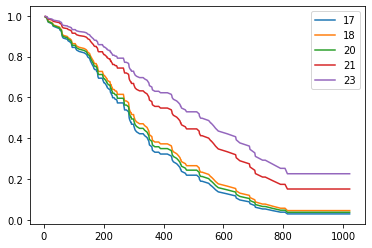

In [15]:
#Plotting the data:

d_data = data.iloc[10:15,:]
cph.predict_survival_function(d_data).plot()

 En el gráfico anterior, podemos ver que la persona 23 tiene la mayor probabilidad de sobrevivir, mientras que la persona 17 tiene la menor posibilidad de sobrevivir. Al revisar la tabla principal, podemos notar un cambio significativo en el valor ph.ecog. También podemos ver que las personas de 21 y 23 años tienen mayores posibilidades de supervivencia ya que tienen el menor valor de ph.ecog.